In [5]:
import importlib
import torch
import torch.nn as nn
import torch.optim as optim
import data_loader
from torchsummary import summary
import config
import model
from torch.optim.lr_scheduler import OneCycleLR
import show_images_from_batch
importlib.reload(model)
importlib.reload(config)
importlib.reload(data_loader)
importlib.reload(show_images_from_batch)

<module 'show_images_from_batch' from 'E:\\TSAI\\EVA_5\\assignment_7\\show_images_from_batch.py'>

In [6]:
net = model.CIFARNet(first_layer_output_size=config.FIRST_LAYER_OUTPUT_SIZE, num_classes=config.NUM_CLASSES).to(config.DEVICE)
criterion = torch.nn.functional.nll_loss
optimizer = optim.SGD(net.parameters(), lr=0.1, momentum=0.9)
scheduler = OneCycleLR(optimizer,max_lr=0.5,total_steps=20)
train_loader, test_loader = data_loader.get_iterators()

In [7]:
net

CIFARNet(
  (first_block): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
  )
  (conv_block1): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.2, inplace=False)
    (4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): ReLU()
    (6): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  )
  (trans_block1): Sequential(
    (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (1): Conv2d(128, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
    (2): ReLU()
    (3): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (4): Dropo

In [8]:
summary(net, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 32, 32]             896
              ReLU-2           [-1, 32, 32, 32]               0
       BatchNorm2d-3           [-1, 32, 32, 32]              64
           Dropout-4           [-1, 32, 32, 32]               0
            Conv2d-5           [-1, 64, 32, 32]          18,496
              ReLU-6           [-1, 64, 32, 32]               0
       BatchNorm2d-7           [-1, 64, 32, 32]             128
           Dropout-8           [-1, 64, 32, 32]               0
            Conv2d-9          [-1, 128, 32, 32]          73,856
             ReLU-10          [-1, 128, 32, 32]               0
      BatchNorm2d-11          [-1, 128, 32, 32]             256
        MaxPool2d-12          [-1, 128, 16, 16]               0
           Conv2d-13           [-1, 32, 16, 16]           4,096
             ReLU-14           [-1, 32,

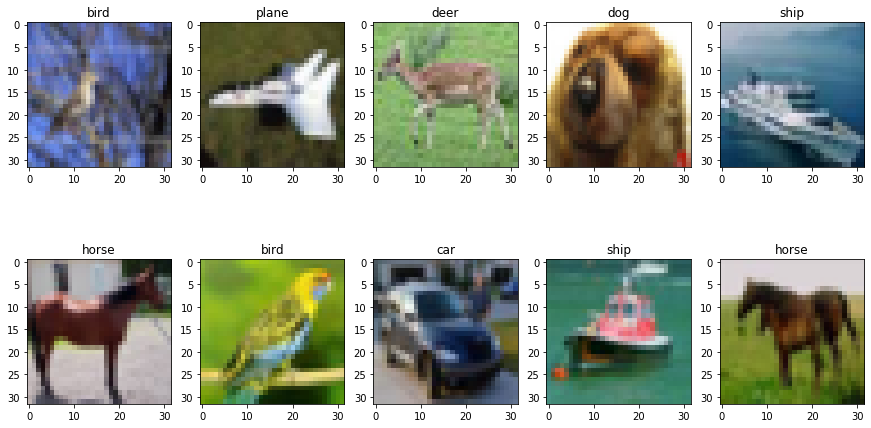

In [9]:
show_images_from_batch.get_images(train_loader)

In [10]:
run = model.Trial(
    name="first_run",
    model=net,
    args={
        "epochs": config.EPOCH,
        "train_loader": train_loader,
        "test_loader": test_loader,
        "optimizer": optimizer,
        "device": config.DEVICE,
        "loss_fn": criterion,
        "scheduler": scheduler
    },
)

run.run()
print("Done!")


  0%|                                                                                  | 1/782 [00:00<01:41,  7.69it/s]

1 / 20


  3%|██                                                                                | 4/157 [00:00<00:04, 32.52it/s]

 Training loss = 0.02526063844561577, Training Accuracy : 41.334


  0%|▏                                                                                 | 2/782 [00:00<01:13, 10.59it/s]

 Test loss = 1.3183940385818482, Test Accuracy : 51.91
2 / 20


  3%|██▌                                                                               | 5/157 [00:00<00:03, 40.65it/s]

 Training loss = 0.019246231764554977, Training Accuracy : 55.626


  0%|▏                                                                                 | 2/782 [00:00<01:10, 11.08it/s]

 Test loss = 0.9981079544067383, Test Accuracy : 63.97
3 / 20


  3%|██                                                                                | 4/157 [00:00<00:03, 39.63it/s]

 Training loss = 0.01654467172920704, Training Accuracy : 62.678


  0%|▏                                                                                 | 2/782 [00:00<01:12, 10.70it/s]

 Test loss = 0.9112327666282654, Test Accuracy : 67.54
4 / 20


  3%|██▌                                                                               | 5/157 [00:00<00:03, 41.67it/s]

 Training loss = 0.014637411572039127, Training Accuracy : 67.504


  0%|▏                                                                                 | 2/782 [00:00<01:13, 10.65it/s]

 Test loss = 0.8308310264587402, Test Accuracy : 70.89
5 / 20


  3%|██                                                                                | 4/157 [00:00<00:03, 39.56it/s]

 Training loss = 0.013324611820280552, Training Accuracy : 70.956


  0%|▏                                                                                 | 2/782 [00:00<01:10, 11.14it/s]

 Test loss = 0.7662211754798889, Test Accuracy : 74.73
6 / 20


  3%|██▌                                                                               | 5/157 [00:00<00:03, 41.64it/s]

 Training loss = 0.012277086265385151, Training Accuracy : 73.332


  0%|▏                                                                                 | 2/782 [00:00<01:13, 10.60it/s]

 Test loss = 0.8022059641838074, Test Accuracy : 72.75
7 / 20


  3%|██▌                                                                               | 5/157 [00:00<00:03, 41.21it/s]

 Training loss = 0.011374433524906635, Training Accuracy : 75.466


  0%|▏                                                                                 | 2/782 [00:00<01:12, 10.70it/s]

 Test loss = 0.7980130569458008, Test Accuracy : 73.54
8 / 20


  3%|██                                                                                | 4/157 [00:00<00:04, 37.31it/s]

 Training loss = 0.010567431338131428, Training Accuracy : 77.198


  0%|▏                                                                                 | 2/782 [00:00<01:11, 10.88it/s]

 Test loss = 0.6569126838684082, Test Accuracy : 77.53
9 / 20


  3%|██                                                                                | 4/157 [00:00<00:03, 38.36it/s]

 Training loss = 0.01000160165131092, Training Accuracy : 78.44


  0%|▏                                                                                 | 2/782 [00:00<01:11, 10.93it/s]

 Test loss = 0.598534232711792, Test Accuracy : 79.65
10 / 20


  3%|██                                                                                | 4/157 [00:00<00:04, 38.09it/s]

 Training loss = 0.009503156878054142, Training Accuracy : 79.534


  0%|                                                                                  | 1/782 [00:00<01:20,  9.69it/s]

 Test loss = 0.6288247259140015, Test Accuracy : 78.97
11 / 20


  3%|██▌                                                                               | 5/157 [00:00<00:03, 40.96it/s]

 Training loss = 0.00907177198678255, Training Accuracy : 80.296


  0%|▏                                                                                 | 2/782 [00:00<01:10, 11.14it/s]

 Test loss = 0.6016786092758178, Test Accuracy : 80.06
12 / 20


  3%|██▌                                                                               | 5/157 [00:00<00:03, 42.02it/s]

 Training loss = 0.008547158911824226, Training Accuracy : 81.466


  0%|                                                                                          | 0/782 [00:00<?, ?it/s]

 Test loss = 0.5866056715011597, Test Accuracy : 80.02
13 / 20


  3%|██▌                                                                               | 5/157 [00:00<00:03, 40.44it/s]

 Training loss = 0.008076922036707401, Training Accuracy : 82.488


  0%|▏                                                                                 | 2/782 [00:00<01:15, 10.36it/s]

 Test loss = 0.5317001349449157, Test Accuracy : 81.9
14 / 20


  3%|██▌                                                                               | 5/157 [00:00<00:03, 40.33it/s]

 Training loss = 0.007548450026661158, Training Accuracy : 83.602


  0%|                                                                                  | 1/782 [00:00<01:18,  9.99it/s]

 Test loss = 0.5085741061210632, Test Accuracy : 82.89
15 / 20


  3%|██▌                                                                               | 5/157 [00:00<00:03, 41.67it/s]

 Training loss = 0.006945410743355751, Training Accuracy : 84.69


  0%|▏                                                                                 | 2/782 [00:00<01:12, 10.72it/s]

 Test loss = 0.5321140793800354, Test Accuracy : 82.37
16 / 20


  3%|██                                                                                | 4/157 [00:00<00:04, 36.31it/s]

 Training loss = 0.006468543317168951, Training Accuracy : 85.718


  0%|                                                                                          | 0/782 [00:00<?, ?it/s]

 Test loss = 0.47239707469940184, Test Accuracy : 84.09
17 / 20


  5%|████▏                                                                             | 8/157 [00:00<00:04, 36.90it/s]

 Training loss = 0.005957457236945629, Training Accuracy : 86.734


  0%|▏                                                                                 | 2/782 [00:00<01:13, 10.58it/s]

 Test loss = 0.49224183378219605, Test Accuracy : 83.68
18 / 20


  3%|██▌                                                                               | 5/157 [00:00<00:03, 40.99it/s]

 Training loss = 0.005434614606201649, Training Accuracy : 87.886


  0%|▏                                                                                 | 2/782 [00:00<01:13, 10.67it/s]

 Test loss = 0.45599471082687376, Test Accuracy : 84.98
19 / 20


  3%|██                                                                                | 4/157 [00:00<00:03, 38.45it/s]

 Training loss = 0.005126036703586578, Training Accuracy : 88.65


  0%|                                                                                          | 0/782 [00:00<?, ?it/s]

 Test loss = 0.451057933139801, Test Accuracy : 85.05
20 / 20


  5%|████▏                                                                             | 8/157 [00:00<00:03, 39.24it/s]

 Training loss = 0.005023325327783823, Training Accuracy : 88.766


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:03<00:00, 40.57it/s]

 Test loss = 0.4555351765632629, Test Accuracy : 84.95
Done!


100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:03<00:00, 40.09it/s]


plot saved at ./images/correctly_classified_images.png


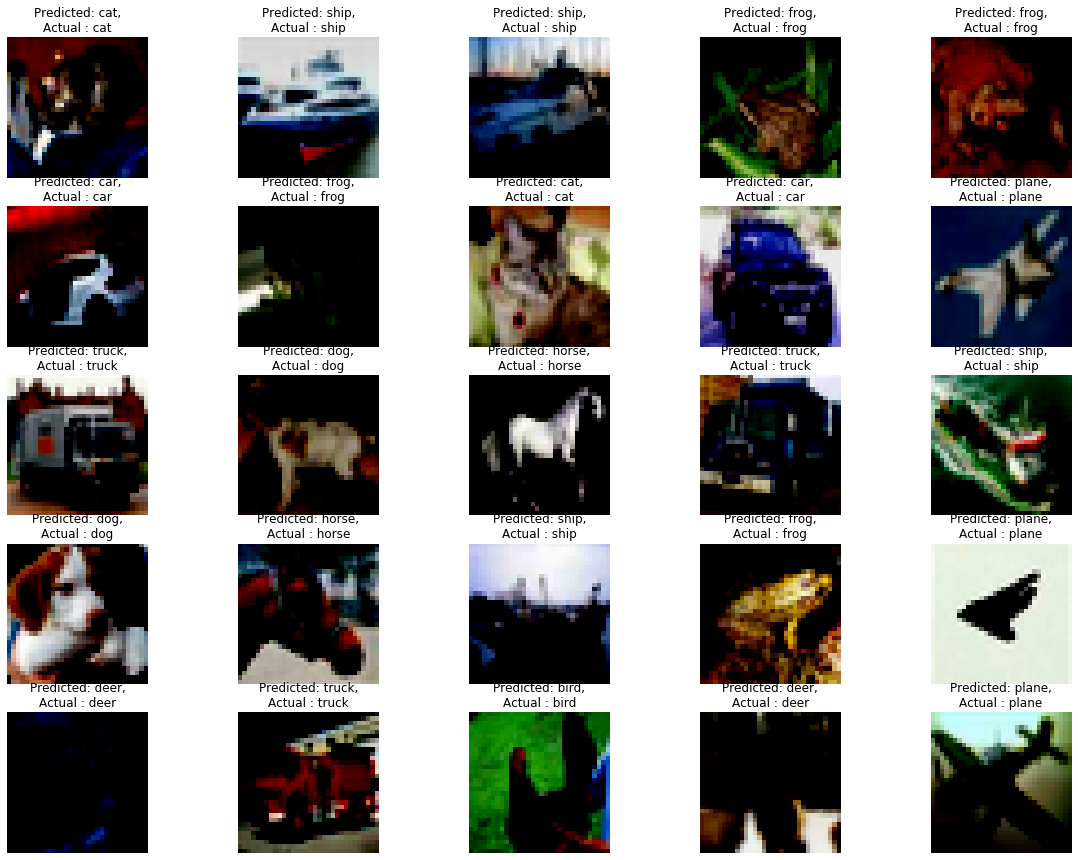

In [11]:
show_images_from_batch.plot_images_by_classification(25, run.model, test_loader, config.DEVICE, misclassified=False)

100%|████████████████████████████████████████████████████████████████████████████████| 157/157 [00:03<00:00, 39.81it/s]


plot saved at ./images/misclassified_images.png


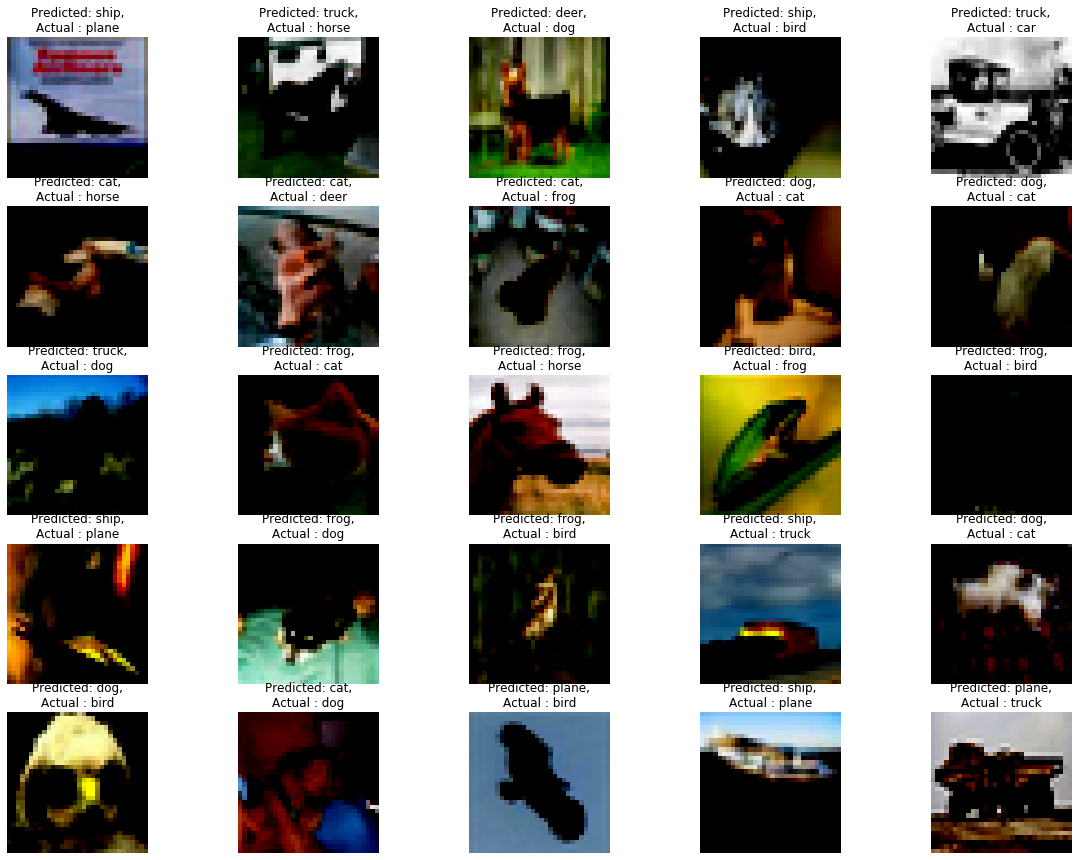

In [12]:
show_images_from_batch.plot_images_by_classification(25, run.model, test_loader, config.DEVICE)

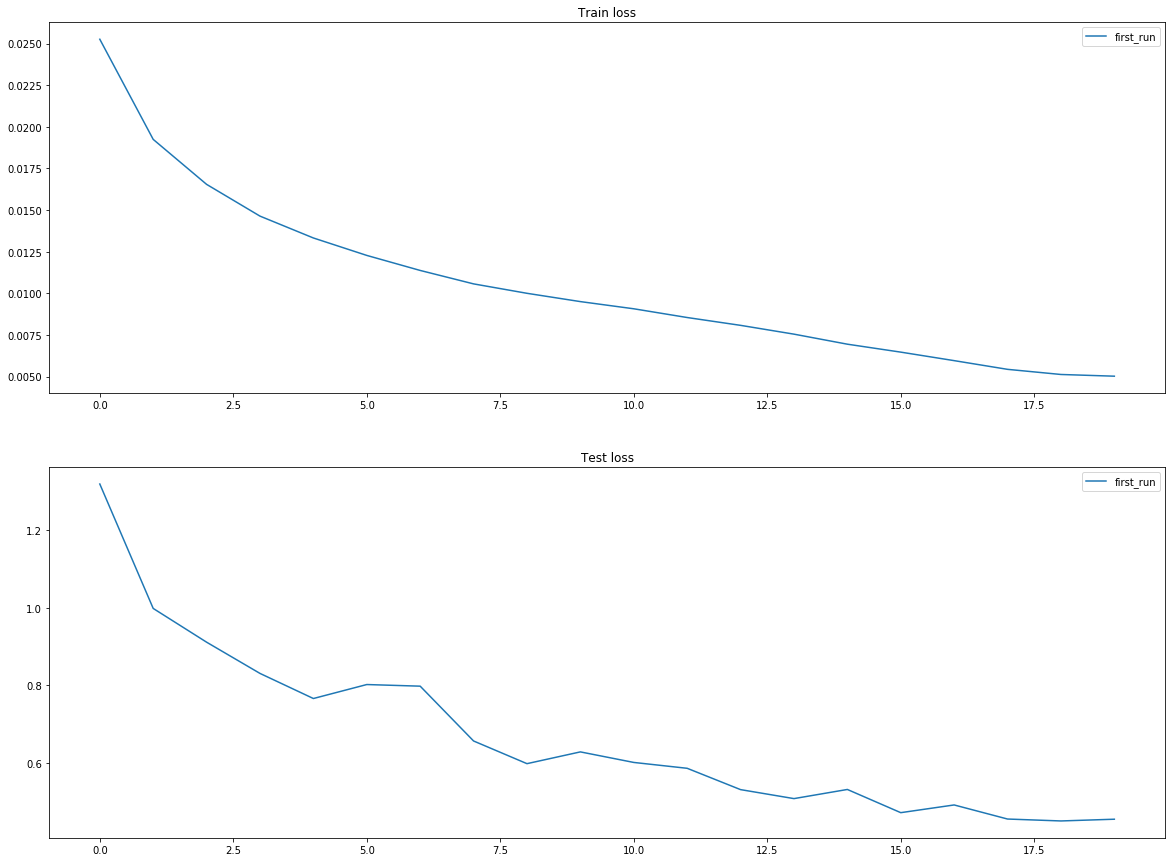

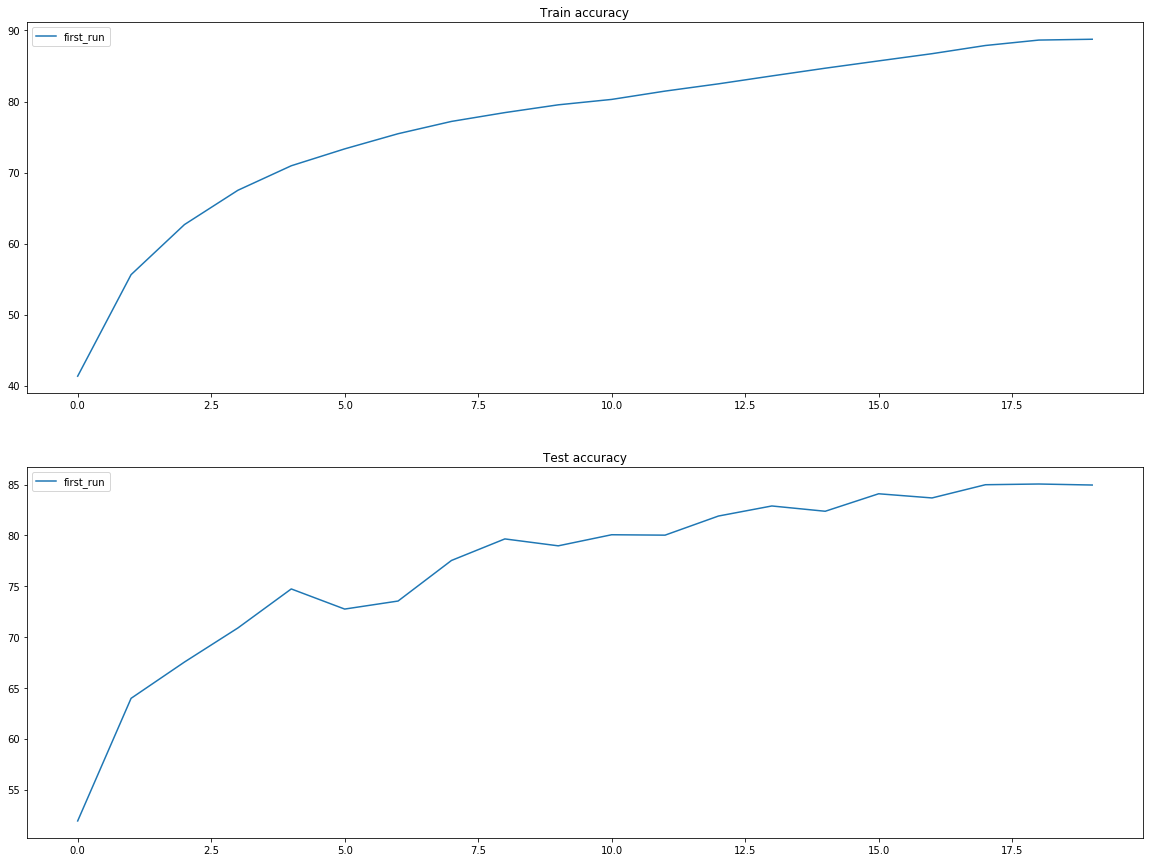

In [13]:
show_images_from_batch.plot_curves_for_trials(run)